<a href="https://colab.research.google.com/github/anjalikokare/MLP-lectures/blob/main/week2_mlp_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data preprocessing**

# * **Transformer mathods**
* fit() --> method learns model parameters from the training set
* transform() --> method applies the leart transformation to the new data.
* fit_transform() --> performs function of both fit() and transform() methods and is more convenient and efficient to use

# **Feature Extraction**

 * **sklearn.feature_extraction --> has useful APIs to extracct features from data**
* 1.**DictVectorizer**
* 2.**FeatureHasher**

* **DictVectorizer**  -->  convert list of mappings of feature name and feature value, into a matrix

In [ ]:
data = [
    {'age':4 , 'height':96.0},
    {'age':1 , 'height':73.9},
    {'age':3 , 'height': 88.9},
    {'age':2 , 'height': 81.6}
    ]

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
df = DictVectorizer(sparse = False)
print(df.fit_transform(data))

[[ 4.  96. ]
 [ 1.  73.9]
 [ 3.  88.9]
 [ 2.  81.6]]


# **FeatureHasher**
* high speed, low-memory vectorizer that uses feature hashing technique
* applies a hash function to determine their column index
* incresed speed and reduced memory usage
* no inverse_transform method
* output - scipy.sparse

# **Feature Extraction from images and text**

* sklearn.feature_extraction.image --> extract features from image data
* sklearn.feature_extraction.text --> extract features from text

# **Data Cleaning**

# **Handling missing values**
* due to erros in data capture
* sensor manufacturing
* measurement errors etc.
* Ml algorithm not work with missing data
* Discarded records cotaining missing values result in loss of valueable training samples



# * **sklearn.impute**
* API provides functinality to fill missing values in a dataset

* 1. SimpleImputer
* 2. KNNImputer
* MissingIndicator -> provides indicators for missing values

## **SimpleImputer**

* fills missing values
* 1. mean
* 2. median
* 3. most_frequent
* 4. constant

In [ ]:
import numpy as np

x = np.array((7,1,np.nan,8,2,np.nan,9,6)).reshape(4,2)
print(x)

[[ 7.  1.]
 [nan  8.]
 [ 2. nan]
 [ 9.  6.]]


In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
si.fit_transform(x)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

## **KNNImputer**

* fill missing values
* n_neighbors
* n_neighbors decided based on Euclidean distance

In [ ]:
x = np.array((1,2,np.nan,3,4,3,np.nan,6,5,8,8,7)).reshape(4,3)
# 4 samples 2 missing values
x

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knni = KNNImputer(n_neighbors=2, weights = 'uniform')
knni.fit_transform(x)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

 **handling missing values PART 2**

In [ ]:
data = [
    {'Roll': 1001, 'Age':25, 'State':'AP', 'Score': 85.0},
    {'Roll': 1002, 'Age':'?', 'State':'AR', 'Score': 90.0},
    {'Roll': 1003, 'Age':np.nan, 'State':'AS', 'Score': 78.0},
    {'Roll': 1004, 'Age':55, 'State':np.nan, 'Score': 88.0},
    {'Roll': 1005, 'Age':22, 'State':'CG', 'Score': np.nan},
    {'Roll': 1006, 'Age':np.nan, 'State':'GA', 'Score': 92},
    {'Roll': 1007, 'Age':29, 'State':np.nan, 'Score': 74},
    {'Roll': 1008, 'Age':'?', 'State':'HR', 'Score': 81.5},
    {'Roll': 1009, 'Age':28, 'State':'JK', 'Score': 79.0},
    {'Roll': 1010, 'Age':35, 'State':'JH', 'Score': np.nan}
]

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
print(df.head())


   Roll  Age State  Score
0  1001   25    AP   85.0
1  1002    ?    AR   90.0
2  1003  NaN    AS   78.0
3  1004   55   NaN   88.0
4  1005   22    CG    NaN


In [ ]:
print(df.isna())
print(df.isna().sum())

    Roll    Age  State  Score
0  False  False  False  False
1  False  False  False  False
2  False   True  False  False
3  False  False   True  False
4  False  False  False   True
5  False   True  False  False
6  False  False   True  False
7  False  False  False  False
8  False  False  False  False
9  False  False  False   True
Roll     0
Age      2
State    2
Score    2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Roll    10 non-null     int64  
 1   Age     8 non-null      object 
 2   State   8 non-null      object 
 3   Score   8 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


In [ ]:
df['Age'].value_counts()

,count
Age,
?,2
25,1
55,1
22,1
29,1
28,1
35,1


In [ ]:
df['State'].unique()

array(['AP', 'AR', 'AS', nan, 'CG', 'GA', 'HR', 'JK', 'JH'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

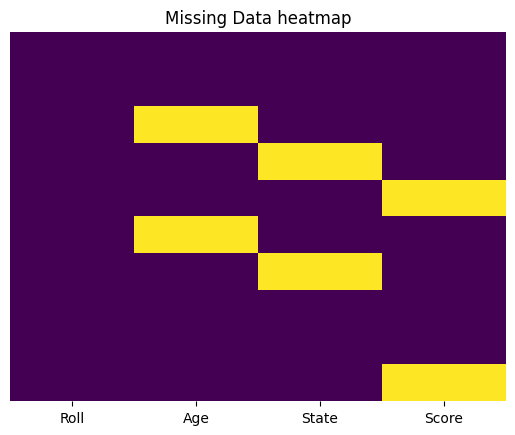

In [ ]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing Data heatmap')
plt.show()

# **Strategies to handle missing values**

* find using other sources
* drop missing data
* fill in with a constant value
* fill in with a measure of central tendancy
* fill in by considering similar datapoints

* **Finding missing values from other sources**
* extract from other - Age & Dob , week & Timestamp, Gender & Honorifics
* mising infomration that exist on the public domain - Cars, Electronics, Movies , Sports

* **Drop Missing data**
* large data with a small percentage of rows caontaing mising data

* **Techniques to impute missing values**
* **Simple Imputer**
* replaces the missing value using a descriptive statistic among mean, median or mmost_frequent(mode) along each column or using a constant value

* **KNN Imputer**
* Each sample's missing values are imputed using the mean value from n_neighbors found in the training set

# **Simple Imputer**

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

x = [[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]

# mean_imputer = SimpleImputer(strategy = 'mean')

knn_imputer = KNNImputer(n_neighbors = 2)
# mean_imputer.fit(x)
knn_imputer.fit(x)

# mean_imputer.transform(x)
knn_imputer.transform(x)

array([[ 7.,  2.,  3.],
       [ 4.,  2.,  6.],
       [10.,  2.,  9.]])